In [33]:
# Libraries
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from scipy import stats
from pandas import Series, DataFrame
from pandas.plotting import autocorrelation_plot
from pylab import rcParams
from matplotlib import collections as collections
from matplotlib.patches import Rectangle
from itertools import cycle
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')
from numpy import median
from numpy import mean

In [34]:
train = pd.read_csv('train.csv')

In [35]:
train.shape

(10886, 12)

In [36]:
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [37]:
train['season'].unique()

array([1, 2, 3, 4])

In [38]:
train.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [39]:
train.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [40]:
train.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [41]:
train.drop_duplicates(subset=None, inplace=True)

In [42]:
train.shape

(10886, 12)

### Get and remove duplicate columns

In [43]:
def getDuplicateColumns(df):
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)


In [44]:
# Get list of duplicate columns
duplicateColumnNames = getDuplicateColumns(train)
 
print('Duplicate Columns are as follows')
for col in duplicateColumnNames:
    print('Column name : ', col)


Duplicate Columns are as follows


In [45]:
train.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [46]:
train['holiday'] = train.holiday.astype('object')
train['workingday'] = train.workingday.astype('object')

In [47]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [48]:
train_num = train.select_dtypes(include=[np.number])

In [49]:
del train_num['count']

In [50]:
Corr = train_num.corr(method='pearson')
Corr

season   weather      temp     atemp  humidity  windspeed  \
season      1.000000  0.008879  0.258689  0.264744  0.190610  -0.147121   
weather     0.008879  1.000000 -0.055035 -0.055376  0.406244   0.007261   
temp        0.258689 -0.055035  1.000000  0.984948 -0.064949  -0.017852   
atemp       0.264744 -0.055376  0.984948  1.000000 -0.043536  -0.057473   
humidity    0.190610  0.406244 -0.064949 -0.043536  1.000000  -0.318607   
windspeed  -0.147121  0.007261 -0.017852 -0.057473 -0.318607   1.000000   
casual      0.096758 -0.135918  0.467097  0.462067 -0.348187   0.092276   
registered  0.164011 -0.109340  0.318571  0.314635 -0.265458   0.091052   

              casual  registered  
season      0.096758    0.164011  
weather    -0.135918   -0.109340  
temp        0.467097    0.318571  
atemp       0.462067    0.314635  
humidity   -0.348187   -0.265458  
windspeed   0.092276    0.091052  
casual      1.000000    0.497250  
registered  0.497250    1.000000

In [51]:
corr = train_num.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

In [52]:
# Delete temp, because atemp"feels like" temperature in Celsius
del train['temp']

In [53]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [54]:
train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [55]:
train.tail(20)

datetime  season holiday workingday  weather   atemp  \
10866  2012-12-19 04:00:00       4       0          1        1  12.120   
10867  2012-12-19 05:00:00       4       0          1        1  14.395   
10868  2012-12-19 06:00:00       4       0          1        1  12.880   
10869  2012-12-19 07:00:00       4       0          1        1  13.635   
10870  2012-12-19 08:00:00       4       0          1        1  12.880   
10871  2012-12-19 09:00:00       4       0          1        1  14.395   
10872  2012-12-19 10:00:00       4       0          1        1  16.665   
10873  2012-12-19 11:00:00       4       0          1        1  20.455   
10874  2012-12-19 12:00:00       4       0          1        1  20.455   
10875  2012-12-19 13:00:00       4       0          1        1  21.210   
10876  2012-12-19 14:00:00       4       0          1        1  21.210   
10877  2012-12-19 15:00:00       4       0          1        1  21.210   
10878  2012-12-19 16:00:00       4       0          1        1  21.210   
10879  2012-12-19 17:00:00       4       0          1        1  20.455   
10880  2012-12-19 18:00:00       4       0          1        1  19.695   
10881  2012-12-19 19:00:00       4       0          1        1  19.695   
10882  2012-12-19 20:00:00       4       0          1        1  17.425   
10883  2012-12-19 21:00:00       4       0          1        1  15.910   
10884  2012-12-19 22:00:00       4       0          1        1  17.425   
10885  2012-12-19 23:00:00       4       0          1        1  16.665   

       humidity  windspeed  casual  registered  count  
10866        75     8.9981       1           6      7  
10867        75     6.0032       2          29     31  
10868        75     6.0032       3         109    112  
10869        75     8.9981       3         360    363  
10870        87     7.0015      13         665    678  
10871        75     7.0015       8         309    317  
10872        70     7.0015      17         147    164  
10873        54    15.0013      31         169    200  
10874        54    19.0012      33         203    236  
10875        50    12.9980      30         183    213  
10876        50    12.9980      33         185    218  
10877        50    19.0012      28         209    237  
10878        50    23.9994      37         297    334  
10879        50    26.0027      26         536    562  
10880        50    23.9994      23         546    569  
10881        50    26.0027       7         329    336  
10882        57    15.0013      10         231    241  
10883        61    15.0013       4         164    168  
10884        61     6.0032      12         117    129  
10885        66     8.9981       4          84     88

In [56]:
import datetime

In [57]:
train['Fecha'] = pd.to_datetime(train.datetime)

In [58]:
train['year'] = pd.DatetimeIndex(train['Fecha']).year
train['month'] = pd.DatetimeIndex(train['Fecha']).month
train['day'] = pd.DatetimeIndex(train['Fecha']).day
train['hour'] = pd.DatetimeIndex(train['Fecha']).hour

In [59]:
train.tail()

datetime  season holiday workingday  weather   atemp  \
10881  2012-12-19 19:00:00       4       0          1        1  19.695   
10882  2012-12-19 20:00:00       4       0          1        1  17.425   
10883  2012-12-19 21:00:00       4       0          1        1  15.910   
10884  2012-12-19 22:00:00       4       0          1        1  17.425   
10885  2012-12-19 23:00:00       4       0          1        1  16.665   

       humidity  windspeed  casual  registered  count               Fecha  \
10881        50    26.0027       7         329    336 2012-12-19 19:00:00   
10882        57    15.0013      10         231    241 2012-12-19 20:00:00   
10883        61    15.0013       4         164    168 2012-12-19 21:00:00   
10884        61     6.0032      12         117    129 2012-12-19 22:00:00   
10885        66     8.9981       4          84     88 2012-12-19 23:00:00   

       year  month  day  hour  
10881  2012     12   19    19  
10882  2012     12   19    20  
10883  2012     12   19    21  
10884  2012     12   19    22  
10885  2012     12   19    23

In [60]:
train['dia'] = pd.DatetimeIndex(train['Fecha']).day_name()

In [61]:
del train['datetime']
del train['Fecha']

In [62]:
train.head()

season holiday workingday  weather   atemp  humidity  windspeed  casual  \
0       1       0          0        1  14.395        81        0.0       3   
1       1       0          0        1  13.635        80        0.0       8   
2       1       0          0        1  13.635        80        0.0       5   
3       1       0          0        1  14.395        75        0.0       3   
4       1       0          0        1  14.395        75        0.0       0   

   registered  count  year  month  day  hour       dia  
0          13     16  2011      1    1     0  Saturday  
1          32     40  2011      1    1     1  Saturday  
2          27     32  2011      1    1     2  Saturday  
3          10     13  2011      1    1     3  Saturday  
4           1      1  2011      1    1     4  Saturday

In [63]:
del train['day']
del train['casual']
del train['registered']

In [64]:
train.head()

season holiday workingday  weather   atemp  humidity  windspeed  count  \
0       1       0          0        1  14.395        81        0.0     16   
1       1       0          0        1  13.635        80        0.0     40   
2       1       0          0        1  13.635        80        0.0     32   
3       1       0          0        1  14.395        75        0.0     13   
4       1       0          0        1  14.395        75        0.0      1   

   year  month  hour       dia  
0  2011      1     0  Saturday  
1  2011      1     1  Saturday  
2  2011      1     2  Saturday  
3  2011      1     3  Saturday  
4  2011      1     4  Saturday

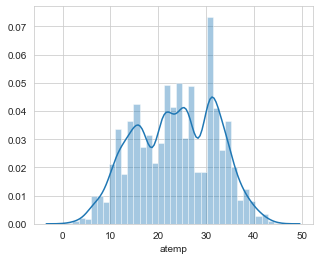

In [65]:
sb.distplot(train['atemp'])

In [66]:
train['season'] = train.season.astype('object')

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 12 columns):
season        10886 non-null object
holiday       10886 non-null object
workingday    10886 non-null object
weather       10886 non-null int64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
hour          10886 non-null int64
dia           10886 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 1.1+ MB


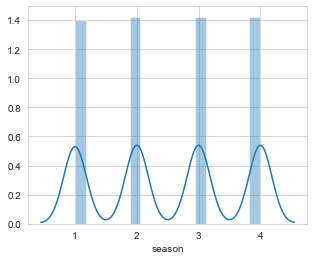

In [68]:
sb.distplot(train.season.astype('object'))

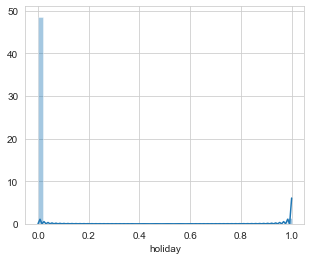

In [69]:
sb.distplot(train.holiday.astype('object'))

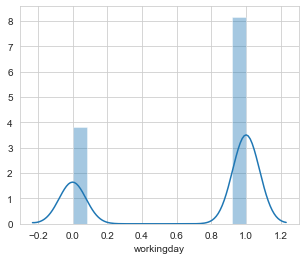

In [70]:
sb.distplot(train.workingday.astype('object'))

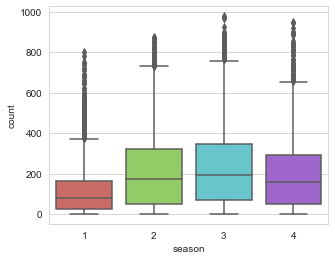

In [71]:
sb.boxplot(x='season', y='count', data=train, palette='hls')

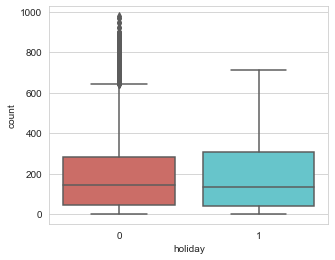

In [72]:
sb.boxplot(x='holiday', y='count', data=train, palette='hls')

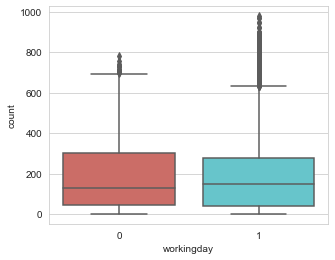

In [73]:
sb.boxplot(x='workingday', y='count', data=train, palette='hls')

In [74]:
train.head()

season holiday workingday  weather   atemp  humidity  windspeed  count  \
0      1       0          0        1  14.395        81        0.0     16   
1      1       0          0        1  13.635        80        0.0     40   
2      1       0          0        1  13.635        80        0.0     32   
3      1       0          0        1  14.395        75        0.0     13   
4      1       0          0        1  14.395        75        0.0      1   

   year  month  hour       dia  
0  2011      1     0  Saturday  
1  2011      1     1  Saturday  
2  2011      1     2  Saturday  
3  2011      1     3  Saturday  
4  2011      1     4  Saturday

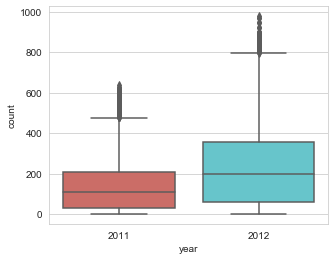

In [75]:
sb.boxplot(x='year', y='count', data=train, palette='hls')

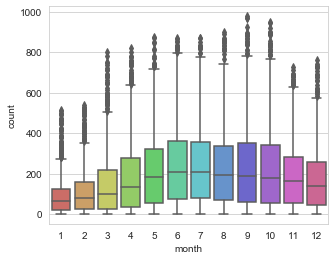

In [76]:
sb.boxplot(x='month', y='count', data=train, palette='hls')

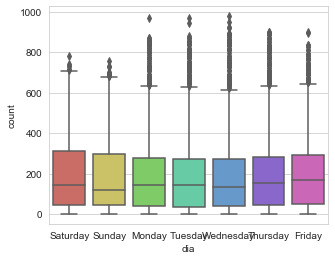

In [77]:
sb.boxplot(x='dia', y='count', data=train, palette='hls')

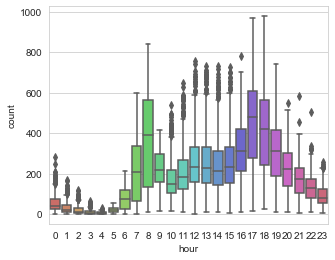

In [78]:
sb.boxplot(x='hour', y='count', data=train, palette='hls')

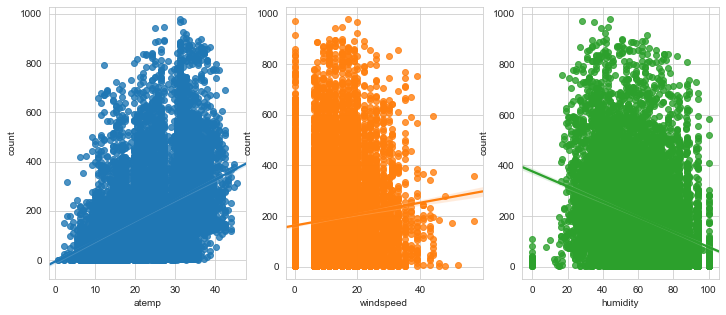

In [79]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sb.regplot(x="atemp", y="count", data=train,ax=ax1)
sb.regplot(x="windspeed", y="count", data=train,ax=ax2)
sb.regplot(x="humidity", y="count", data=train,ax=ax3)

[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Season'),
 None]

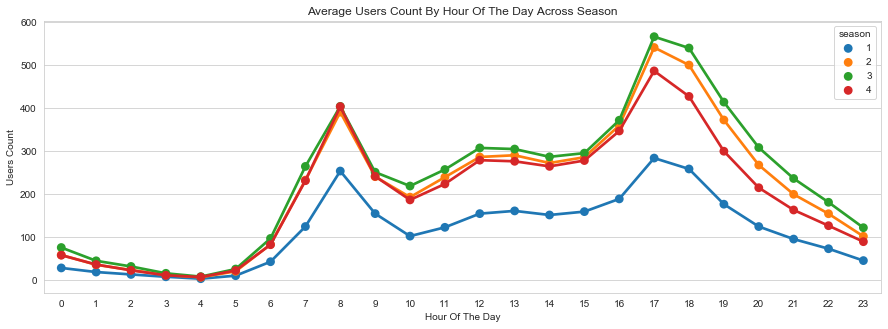

In [80]:
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(15,5)

hourAggregated = pd.DataFrame(train.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sb.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"],
             data=hourAggregated, join=True,ax=ax1)
ax1.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')


In [81]:
hourAggregated.head()

hour  season      count
0     0       1  28.292035
1     0       2  58.473684
2     0       3  75.675439
3     0       4  57.877193
4     1       1  18.761062

In [82]:
train.head()

season holiday workingday  weather   atemp  humidity  windspeed  count  \
0      1       0          0        1  14.395        81        0.0     16   
1      1       0          0        1  13.635        80        0.0     40   
2      1       0          0        1  13.635        80        0.0     32   
3      1       0          0        1  14.395        75        0.0     13   
4      1       0          0        1  14.395        75        0.0      1   

   year  month  hour       dia  
0  2011      1     0  Saturday  
1  2011      1     1  Saturday  
2  2011      1     2  Saturday  
3  2011      1     3  Saturday  
4  2011      1     4  Saturday

In [83]:
train.month.value_counts()

7     912
6     912
5     912
12    912
8     912
11    911
10    911
4     909
9     909
3     901
2     901
1     884
Name: month, dtype: int64

[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Day of Week'),
 Text(0.5, 1.0, 'Average Users Count By Day Across Months'),
 None]

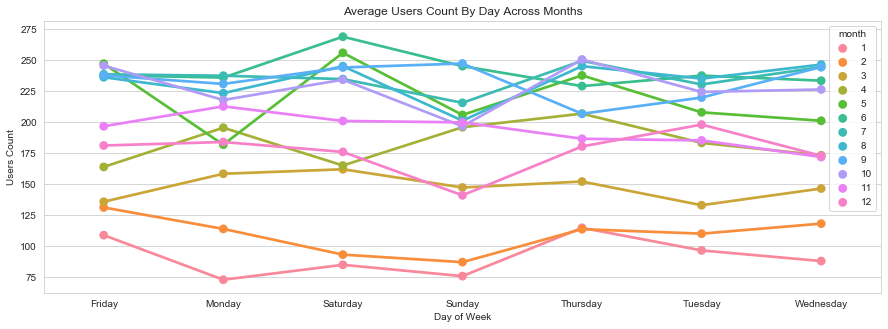

In [84]:
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(15,5)

temp = pd.DataFrame(train.groupby(['dia', 'month'])['count'].mean()).reset_index()

sb.pointplot(x=temp['dia'], y=temp['count'],hue=temp['month'], data=temp, join=True,ax=ax1)
ax1.set(xlabel='Day of Week', ylabel='Users Count',title="Average Users Count By Day Across Months",label='big')


In [85]:
temp = pd.DataFrame(train.groupby(['dia', 'month'])['count'].mean()).reset_index()


In [86]:
train.head()

season holiday workingday  weather   atemp  humidity  windspeed  count  \
0      1       0          0        1  14.395        81        0.0     16   
1      1       0          0        1  13.635        80        0.0     40   
2      1       0          0        1  13.635        80        0.0     32   
3      1       0          0        1  14.395        75        0.0     13   
4      1       0          0        1  14.395        75        0.0      1   

   year  month  hour       dia  
0  2011      1     0  Saturday  
1  2011      1     1  Saturday  
2  2011      1     2  Saturday  
3  2011      1     3  Saturday  
4  2011      1     4  Saturday

In [87]:
cat_columns = ["year"]
train = pd.get_dummies(train, prefix_sep="_", columns=cat_columns)
cat_columns = ["month"]
train = pd.get_dummies(train, prefix_sep="_", columns=cat_columns)
cat_columns = ["hour"]
train = pd.get_dummies(train, prefix_sep="_", columns=cat_columns)
cat_columns = ["dia"]
train = pd.get_dummies(train, prefix_sep="_", columns=cat_columns)

In [88]:
# Get column names first
names = ['atemp', 'humidity', 'windspeed']
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(train[names])
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [89]:
train = train.drop(['atemp', 'humidity', 'windspeed'], axis = 1) 

In [90]:
train.shape

(10886, 50)

In [91]:
scaled_df.head()

atemp  humidity  windspeed
0 -1.092737  0.993213  -1.567754
1 -1.182421  0.941249  -1.567754
2 -1.182421  0.941249  -1.567754
3 -1.092737  0.681430  -1.567754
4 -1.092737  0.681430  -1.567754

In [92]:
resultado = pd.concat([train, scaled_df], axis = 1)

In [93]:
resultado.head()

season holiday workingday  weather  count  year_2011  year_2012  month_1  \
0      1       0          0        1     16          1          0        1   
1      1       0          0        1     40          1          0        1   
2      1       0          0        1     32          1          0        1   
3      1       0          0        1     13          1          0        1   
4      1       0          0        1      1          1          0        1   

   month_2  month_3  ...  dia_Friday  dia_Monday  dia_Saturday  dia_Sunday  \
0        0        0  ...           0           0             1           0   
1        0        0  ...           0           0             1           0   
2        0        0  ...           0           0             1           0   
3        0        0  ...           0           0             1           0   
4        0        0  ...           0           0             1           0   

   dia_Thursday  dia_Tuesday  dia_Wednesday     atemp  humidity  windspeed  
0             0            0              0 -1.092737  0.993213  -1.567754  
1             0            0              0 -1.182421  0.941249  -1.567754  
2             0            0              0 -1.182421  0.941249  -1.567754  
3             0            0              0 -1.092737  0.681430  -1.567754  
4             0            0              0 -1.092737  0.681430  -1.567754  

[5 rows x 53 columns]

In [94]:
y = train['count']
X = train.loc[:, train.columns != 'count']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [96]:
lm = LinearRegression()

In [97]:
lm.fit(X_train,y_train)

LinearRegression()

In [98]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 1.51946630e+14  6.70687348e+14  6.70687348e+14 -3.57134312e+01
 -5.50134802e+14 -5.50134802e+14 -1.07431024e+15 -1.07431024e+15
 -1.07431024e+15 -1.22625687e+15 -1.22625687e+15 -1.22625687e+15
 -1.37820350e+15 -1.37820350e+15 -1.37820350e+15 -1.53015013e+15
 -1.53015013e+15 -1.53015013e+15  2.93416263e+13  2.93416263e+13
  2.93416263e+13  2.93416263e+13  2.93416263e+13  2.93416263e+13
  2.93416263e+13  2.93416263e+13  2.93416263e+13  2.93416263e+13
  2.93416263e+13  2.93416263e+13  2.93416263e+13  2.93416263e+13
  2.93416263e+13  2.93416263e+13  2.93416263e+13  2.93416263e+13
  2.93416263e+13  2.93416263e+13  2.93416263e+13  2.93416263e+13
  2.93416263e+13  2.93416263e+13 -4.04499139e+14 -4.04499139e+14
  2.66188209e+14  2.66188209e+14 -4.04499139e+14 -4.04499139e+14
 -4.04499139e+14]


In [99]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

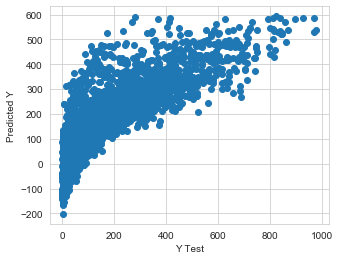

In [100]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [101]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 77.31171932402646
MSE: 11030.331144379134
RMSE: 105.02538333364527


In [102]:
#def rmsle(y, y0):
#    return np.sqrt(np.mean(np.square(np.log1p(y) - np.log1p(y0))))

In [103]:
r2_score(y_test, predictions)

0.6570447627678038

### Ridge

In [104]:
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.69
Test set score: 0.66


In [105]:
ridge10 = Ridge(alpha=15).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.69
Test set score: 0.66


In [106]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.69
Test set score: 0.66


### Lasso

In [107]:
lasso00001 = Lasso(alpha=0.1, max_iter=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.69
Test set score: 0.66
Number of features used: 42


### Create quadratic and cubic features

In [108]:
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X_train)
X_cubic = cubic.fit_transform(X_train)

In [109]:
lm_cuad = lm.fit(X_quad, y_train)
y_quad_fit = lm_cuad.predict(quadratic.fit_transform(X_test))
quadratic_r2 = r2_score(y_test, y_quad_fit) #lm.predict(X_quad))
print(quadratic_r2)

0.8931607121982295


In [ ]:
#lm_cubic = lm.fit(X_cubic, y_train)
#y_cubic_fit = lm_cubic.predict(cubic.fit_transform(X_test))
#cubic_r2 = r2_score(y_test, y_cubic_fit) #lm.predict(X_quad))
#print(cubic_r2)